This notebook cleans and prepares our CLV data for feature engineering:

+ validating data types

+ resolving time-based features into numeric form

+ handling imbalanced and outliers

+ ensuring no data leakage


In [305]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

df = pd.read_parquet("../data/processed/clv_table_data.parquet")
df.head()

,customer_id,transaction_count,promo_code_used,quantity,total_spent,avg_order_value,first_purchase_date,last_purchase_date,recency,customer_age,payment_method_count,future_spend
0,3,12,11,25,20243575.0,963979.761905,2021-01-10 07:56:16.844494,2021-12-12 12:35:12.844494,19 days 11:24:47.155506,355 days 16:03:43.155506,2,2998828.0
1,8,5,1,9,3237281.0,539546.833333,2021-02-13 09:47:39.656991,2021-12-14 20:12:39.656991,17 days 03:47:20.343009,321 days 14:12:20.343009,2,1521320.0
2,9,3,0,5,3206995.0,641399.000000,2021-06-27 01:51:48.421034,2021-11-08 04:42:31.421034,53 days 19:17:28.578966,187 days 22:08:11.578966,2,906635.0
3,15,1,1,1,127423.0,127423.000000,2021-06-12 04:30:42.105040,2021-06-12 04:30:42.105040,202 days 19:29:17.894960,202 days 19:29:17.894960,1,73320.0
4,18,7,11,16,12794750.0,913910.714286,2021-02-01 17:46:18.010289,2021-11-29 19:50:58.010289,32 days 04:09:01.989711,333 days 06:13:41.989711,2,1980302.0


In [306]:
df.info()

<class 'pandas.DataFrame'>
RangeIndex: 36086 entries, 0 to 36085
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype          
---  ------                --------------  -----          
 0   customer_id           36086 non-null  int64          
 1   transaction_count     36086 non-null  int64          
 2   promo_code_used       36086 non-null  int64          
 3   quantity              36086 non-null  int64          
 4   total_spent           36086 non-null  float64        
 5   avg_order_value       36086 non-null  float64        
 6   first_purchase_date   36086 non-null  datetime64[us] 
 7   last_purchase_date    36086 non-null  datetime64[us] 
 8   recency               36086 non-null  timedelta64[us]
 9   customer_age          36086 non-null  timedelta64[us]
 10  payment_method_count  36086 non-null  int64          
 11  future_spend          36086 non-null  float64        
dtypes: datetime64[us](2), float64(3), int64(5), timedelta64[us](2)
memory u

__We'll clean up how the purchase dates are shown__

In [307]:

df["first_purchase_date"] = pd.to_datetime(df["first_purchase_date"].dt.strftime("%Y-%m-%d %H:%M"))
df["last_purchase_date"] = pd.to_datetime(df["last_purchase_date"].dt.strftime("%Y-%m-%d %H:%M"))

In [308]:
df.head()

,customer_id,transaction_count,promo_code_used,quantity,total_spent,avg_order_value,first_purchase_date,last_purchase_date,recency,customer_age,payment_method_count,future_spend
0,3,12,11,25,20243575.0,963979.761905,2021-01-10 07:56:00,2021-12-12 12:35:00,19 days 11:24:47.155506,355 days 16:03:43.155506,2,2998828.0
1,8,5,1,9,3237281.0,539546.833333,2021-02-13 09:47:00,2021-12-14 20:12:00,17 days 03:47:20.343009,321 days 14:12:20.343009,2,1521320.0
2,9,3,0,5,3206995.0,641399.000000,2021-06-27 01:51:00,2021-11-08 04:42:00,53 days 19:17:28.578966,187 days 22:08:11.578966,2,906635.0
3,15,1,1,1,127423.0,127423.000000,2021-06-12 04:30:00,2021-06-12 04:30:00,202 days 19:29:17.894960,202 days 19:29:17.894960,1,73320.0
4,18,7,11,16,12794750.0,913910.714286,2021-02-01 17:46:00,2021-11-29 19:50:00,32 days 04:09:01.989711,333 days 06:13:41.989711,2,1980302.0


__26.5% of customers generated no revenue__

In [309]:
df.query('future_spend == 0').count()   # 9594 generated us no revenue
df.query('future_spend > 0').count()   # 26492 generated us revenue

customer_id             26492
transaction_count       26492
promo_code_used         26492
quantity                26492
total_spent             26492
avg_order_value         26492
first_purchase_date     26492
last_purchase_date      26492
recency                 26492
customer_age            26492
payment_method_count    26492
future_spend            26492
dtype: int64

In [310]:
df.sample(5)

,customer_id,transaction_count,promo_code_used,quantity,total_spent,avg_order_value,first_purchase_date,last_purchase_date,recency,customer_age,payment_method_count,future_spend
20961,57836,1,0,1,350562.0,350562.000000,2021-06-11 09:05:00,2021-06-11 09:05:00,203 days 14:54:58.562634,203 days 14:54:58.562634,1,613378.0
9630,26417,14,7,34,14341685.0,717084.250000,2021-01-04 14:02:00,2021-12-21 17:38:00,10 days 06:21:02.825606,361 days 09:57:35.825606,4,3413457.0
23199,63971,5,0,14,6437266.0,804658.250000,2021-08-16 10:54:00,2021-12-22 14:27:00,9 days 09:32:28.041066,137 days 13:05:26.041066,2,2551138.0
32055,88810,2,0,2,636930.0,318465.000000,2021-02-25 16:37:00,2021-08-18 18:11:00,135 days 05:48:06.919508,309 days 07:22:06.919508,2,173481.0
12974,35666,5,5,8,4668207.0,666886.714286,2021-02-05 15:42:00,2021-11-07 18:07:00,54 days 05:52:50.533355,329 days 08:17:19.533355,2,1213113.0


In [311]:
df.info()

<class 'pandas.DataFrame'>
RangeIndex: 36086 entries, 0 to 36085
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype          
---  ------                --------------  -----          
 0   customer_id           36086 non-null  int64          
 1   transaction_count     36086 non-null  int64          
 2   promo_code_used       36086 non-null  int64          
 3   quantity              36086 non-null  int64          
 4   total_spent           36086 non-null  float64        
 5   avg_order_value       36086 non-null  float64        
 6   first_purchase_date   36086 non-null  datetime64[us] 
 7   last_purchase_date    36086 non-null  datetime64[us] 
 8   recency               36086 non-null  timedelta64[us]
 9   customer_age          36086 non-null  timedelta64[us]
 10  payment_method_count  36086 non-null  int64          
 11  future_spend          36086 non-null  float64        
dtypes: datetime64[us](2), float64(3), int64(5), timedelta64[us](2)
memory u

<hr/>

__A correlation heatmap shows top features we are going to prioritize for making predictions__
+ transaction count
+ quantity
+ number of payment method used
+ number of promo codes used
+ How recent their last purchase was

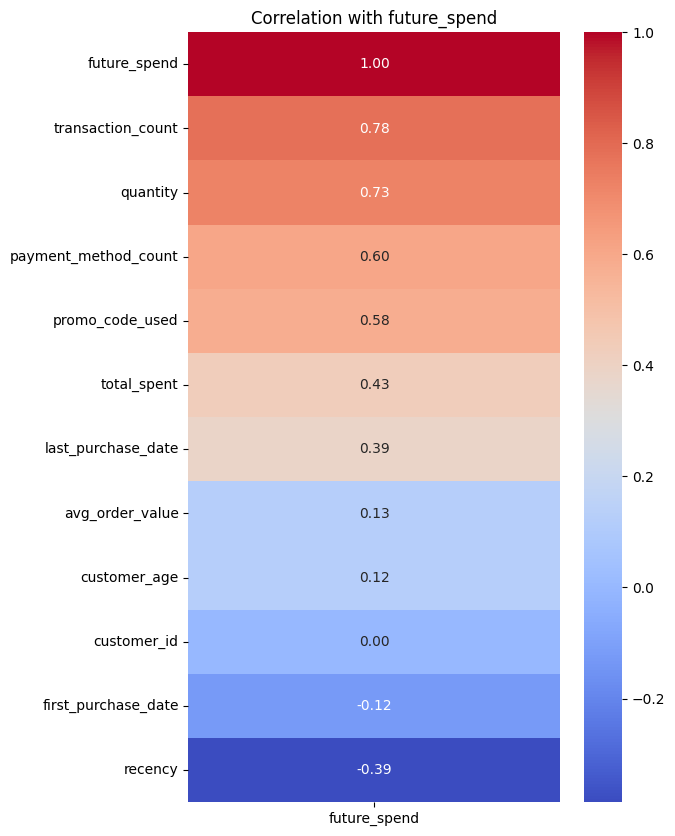

In [312]:

plt.figure(figsize=(6, 10))
sns.heatmap(df.corr()[['future_spend']].sort_values(by='future_spend', ascending=False), 
            annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation with future_spend')
plt.show()

__Save the cleaned data__

In [313]:
df.to_parquet("../data/processed/cleaned_clv_data.parquet", index=False)